In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None



# Now we need to read in the data
df = pd.read_csv('movies.csv')

1. Data Exploration
- Viewing though the data to find any errors 

In [2]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


**Check the data types**

In [3]:
print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


**Find The Null Values**

In [4]:
## null values 
for col in df.columns:
    perc = np.mean(df[col].isnull())
    print('{} - {}%'.format(col,round(perc*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [5]:
df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

**Find Duplicates**

In [6]:
duplicateDFRow = df[df.duplicated('name')]
duplicateDFRow

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
1360,The Bear,PG,Adventure,1988,"October 27, 1989 (United States)",7.7,17000.0,Jean-Jacques Annaud,James Oliver Curwood,Tchéky Karyo,France,NaN,31753898.0,Price,96.0
1836,Impulse,R,Crime,1990,"April 6, 1990 (United States)",5.7,1200.0,Sondra Locke,John DeMarco,Theresa Russell,United States,9000000.0,2544504.0,Warner Bros.,109.0
2022,Paradise,PG-13,Drama,1991,"October 4, 1991 (United States)",6.7,2700.0,Mary Agnes Donoghue,Mary Agnes Donoghue,Melanie Griffith,United States,NaN,18634643.0,Grand Highway Productions,111.0
2104,Forever Young,PG,Drama,1992,"December 16, 1992 (United States)",6.3,45000.0,Steve Miner,J.J. Abrams,Mel Gibson,United States,NaN,127956187.0,Warner Bros.,102.0
2368,Dream Lover,R,Drama,1993,"May 6, 1994 (United States)",6.2,4500.0,Nicholas Kazan,Nicholas Kazan,James Spader,United States,NaN,256264.0,PolyGram Filmed Entertainment,103.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7526,The Kid,R,Biography,2019,"March 8, 2019 (United States)",5.9,7400.0,Vincent D'Onofrio,Vincent D'Onofrio,Jake Schur,United States,8000000.0,1561698.0,Mimran Schur Pictures,100.0
7529,Child's Play,R,Drama,2019,"June 21, 2019 (United States)",5.8,47000.0,Lars Klevberg,Tyler Burton Smith,Tim Matheson,Canada,10000000.0,44907074.0,Orion Pictures,90.0
7536,Shaft,R,Action,2019,"June 14, 2019 (United States)",6.4,48000.0,Tim Story,Ernest Tidyman,Samuel L. Jackson,United States,35000000.0,21360215.0,Davis Entertainment,111.0
7556,After the Wedding,PG-13,Drama,2019,"November 1, 2019 (United Kingdom)",6.3,6700.0,Bart Freundlich,Bart Freundlich,Julianne Moore,United States,NaN,2790019.0,Sony Pictures Classics,112.0


**Findings from exploring the data**<br>
- Release year column and year column are differnet in some rows need to make a new column for the corret year.<br>
- Data type needs adjustments.<br>
- Found nulls :'small amount of missing data would not affect the analysis if removed'.<br>
- Found duplicates: 'Removing them to insure credibilty'.<br>

2. Data Cleaning
- Droping the null values found to ensure credability of the data set
- Droping the duplicates.

In [7]:
df = df.dropna()

In [8]:
df = df.drop_duplicates('name')

In [9]:
duplicateDFRow = df[df.duplicated('name')]
duplicateDFRow

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime


In [10]:
# Changing budget data type from float64 to int64

df['budget'] = df['budget'].astype('int64')

# Changing gross data type from float64 to int64

df['gross'] = df['gross'].astype('int64')

# Changing runtime data type from float64 to int64

df['runtime'] = df['runtime'].astype('int64')

# Changing votes data type from float64 to int64

df['votes'] = df['votes'].astype('int64')

In [11]:
#- Making a new column for the correct year

df['year_correct'] = df['released'].str.extract(r'(\d{4})').astype(int)


In [12]:
df.isnull().sum()

name            0
rating          0
genre           0
year            0
released        0
score           0
votes           0
director        0
writer          0
star            0
country         0
budget          0
gross           0
company         0
runtime         0
year_correct    0
dtype: int64

3. Descriptive Analysis <br><br>
Steps
- View all the measures.
- Find correlation between the data.
- Making some visualization of the attributes to show trends, correlations, and comparing some attributes.
- Conculsion on findings.

In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,5336.0,2.001507e+03,1.052154e+01,1980.0,1993.00,2002.0,2010.0,2.020000e+03
score,5336.0,6.395184e+00,9.628007e-01,1.9,5.80,6.5,7.1,9.300000e+00
votes,5336.0,1.142297e+05,1.835383e+05,195.0,19000.00,52000.0,128000.0,2.400000e+06
budget,5336.0,3.564905e+07,4.124171e+07,6000.0,10000000.00,21000000.0,45000000.0,3.560000e+08
gross,5336.0,1.015924e+08,1.841672e+08,309.0,10622833.75,35927567.0,110353970.0,2.847246e+09
runtime,5336.0,1.080877e+02,1.811038e+01,63.0,95.00,105.0,118.0,2.710000e+02
year_correct,5336.0,2.001662e+03,1.053359e+01,1980.0,1993.00,2002.0,2011.0,2.020000e+03


Some conclusions
 1. The studied time lapse goes from 1980 to 2020
 2. The average film duration is 2 h 33 min.

In [14]:
# Converting the year_correct to string to get the most frequent year with releaseed movies
df['year_correct'] = df['year_correct'].astype(str)

In [15]:
# Getting an idea of the Object values in our dataset

df.describe(include = ['O']).T

,count,unique,top,freq
name,5336,5336,The Shining,1
rating,5336,10,R,2557
genre,5336,15,Comedy,1483
released,5336,2546,"August 26, 2016 (United States)",7
director,5336,2045,Woody Allen,33
writer,5336,3178,Woody Allen,32
star,5336,1830,Nicolas Cage,39
country,5336,50,United States,4251
company,5336,1464,Universal Pictures,328
year_correct,5336,41,2002,167


Some Conclusions

 1. Highest counts for rating is R rated
 2. Highest counts for genre is Comedy 
 3. Woody Allen directed 33 movies 
 4. Nicolas Cage made 39 movies
 5. Most releases movies was in 2002 with 167 movies in one year

In [16]:
# Converting the year_correct to int64 to its original type

df['year_correct'] = df['year_correct'].astype(int)

II - Correlation
- Viewing correlation between the data 'Numercial data'

In [17]:
df.corr()

,year,score,votes,budget,gross,runtime,year_correct
year,1.000000,0.061236,0.207542,0.326118,0.271863,0.075414,0.998707
score,0.061236,1.000000,0.473250,0.071325,0.222235,0.413459,0.066723
votes,0.207542,0.473250,1.000000,0.438567,0.618162,0.348798,0.204546
budget,0.326118,0.071325,0.438567,1.000000,0.737723,0.317912,0.318617
gross,0.271863,0.222235,0.618162,0.737723,1.000000,0.276189,0.266149
runtime,0.075414,0.413459,0.348798,0.317912,0.276189,1.000000,0.075648
year_correct,0.998707,0.066723,0.204546,0.318617,0.266149,0.075648,1.000000


there is high correlation between votes and gross , budget and gross

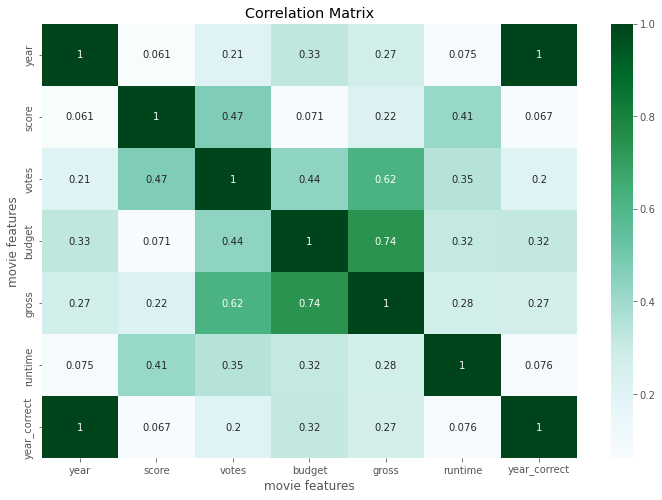

In [18]:
# Correlation by heatmap
heat_corr = df.corr()
sns.heatmap(heat_corr , linecolor='white' , annot=True, cmap="BuGn")
plt.title("Correlation Matrix")
plt.xlabel("movie features")
plt.ylabel("movie features")
plt.show()

high correlation between budget and gross and some what high correlation between votes and gross

In [19]:
df_num = df.copy()

for col in df_num.columns:
    if(df_num[col].dtype == 'object'):
        df_num[col]=df_num[col].astype('category')
        df_num[col]=df_num[col].cat.codes
        
        
df_num        

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,year_correct
0,4692,6,6,1980,1297,8.4,927000,1779,2809,696,46,19000000,46998772,1416,146,1980
1,3929,6,1,1980,1120,5.8,65000,1566,1147,214,47,4500000,58853106,449,104,1980
2,3641,4,0,1980,1352,8.7,1200000,752,1800,1149,47,18000000,538375067,939,124,1980
3,204,4,4,1980,1120,7.7,221000,884,1400,1465,47,3500000,83453539,1100,88,1980
4,732,6,4,1980,1163,7.3,108000,715,347,271,47,6000000,39846344,1075,98,1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7648,415,6,0,2020,900,6.6,140000,16,2369,1797,47,90000000,426505244,449,124,2020
7649,3556,4,0,2020,709,6.5,102000,847,2288,147,47,85000000,319715683,1100,99,2020
7650,1153,4,1,2020,900,5.6,53000,1792,2804,1461,47,175000000,245487753,1387,101,2020
7651,3978,4,1,2020,754,6.8,42000,294,2070,637,6,135000000,111105497,12,100,2020


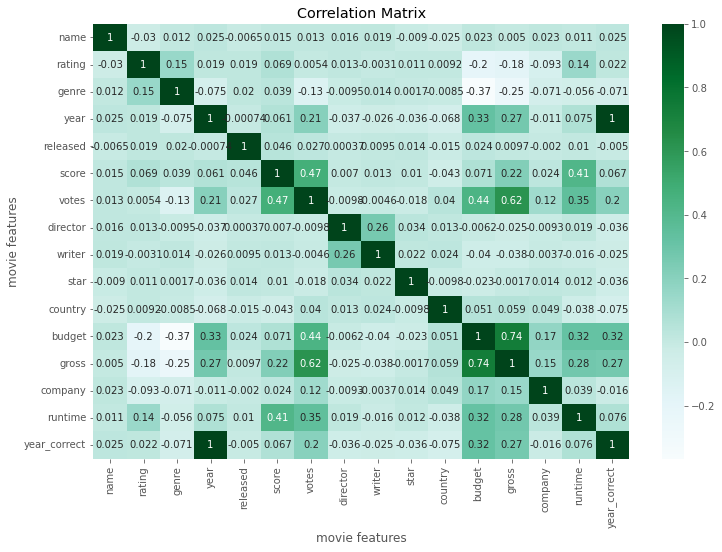

In [20]:
category_corr = df_num.corr()
sns.heatmap(category_corr , linecolor='white', annot=True , cmap='BuGn')
plt.title("Correlation Matrix")
plt.xlabel("movie features")
plt.ylabel("movie features")
plt.show()

In [21]:
# correlation using unstacking 
co = df_num.corr()
costack = co.unstack()
scmstack = costack.sort_values()
scmstack

genre         budget         -0.366326
budget        genre          -0.366326
genre         gross          -0.246023
gross         genre          -0.246023
rating        budget         -0.202192
                                ...   
year          year            1.000000
genre         genre           1.000000
rating        rating          1.000000
runtime       runtime         1.000000
year_correct  year_correct    1.000000
Length: 256, dtype: float64

In [22]:
scmstack[((scmstack) > 0.5) & ((scmstack) < 1.0)].sort_values(ascending = False)

year          year_correct    0.998707
year_correct  year            0.998707
gross         budget          0.737723
budget        gross           0.737723
votes         gross           0.618162
gross         votes           0.618162
dtype: float64

In [23]:
#Votes and Budget has high correlation with gross 

III - Data Visualization
- Ploting attributes togther to get a look at the dataset

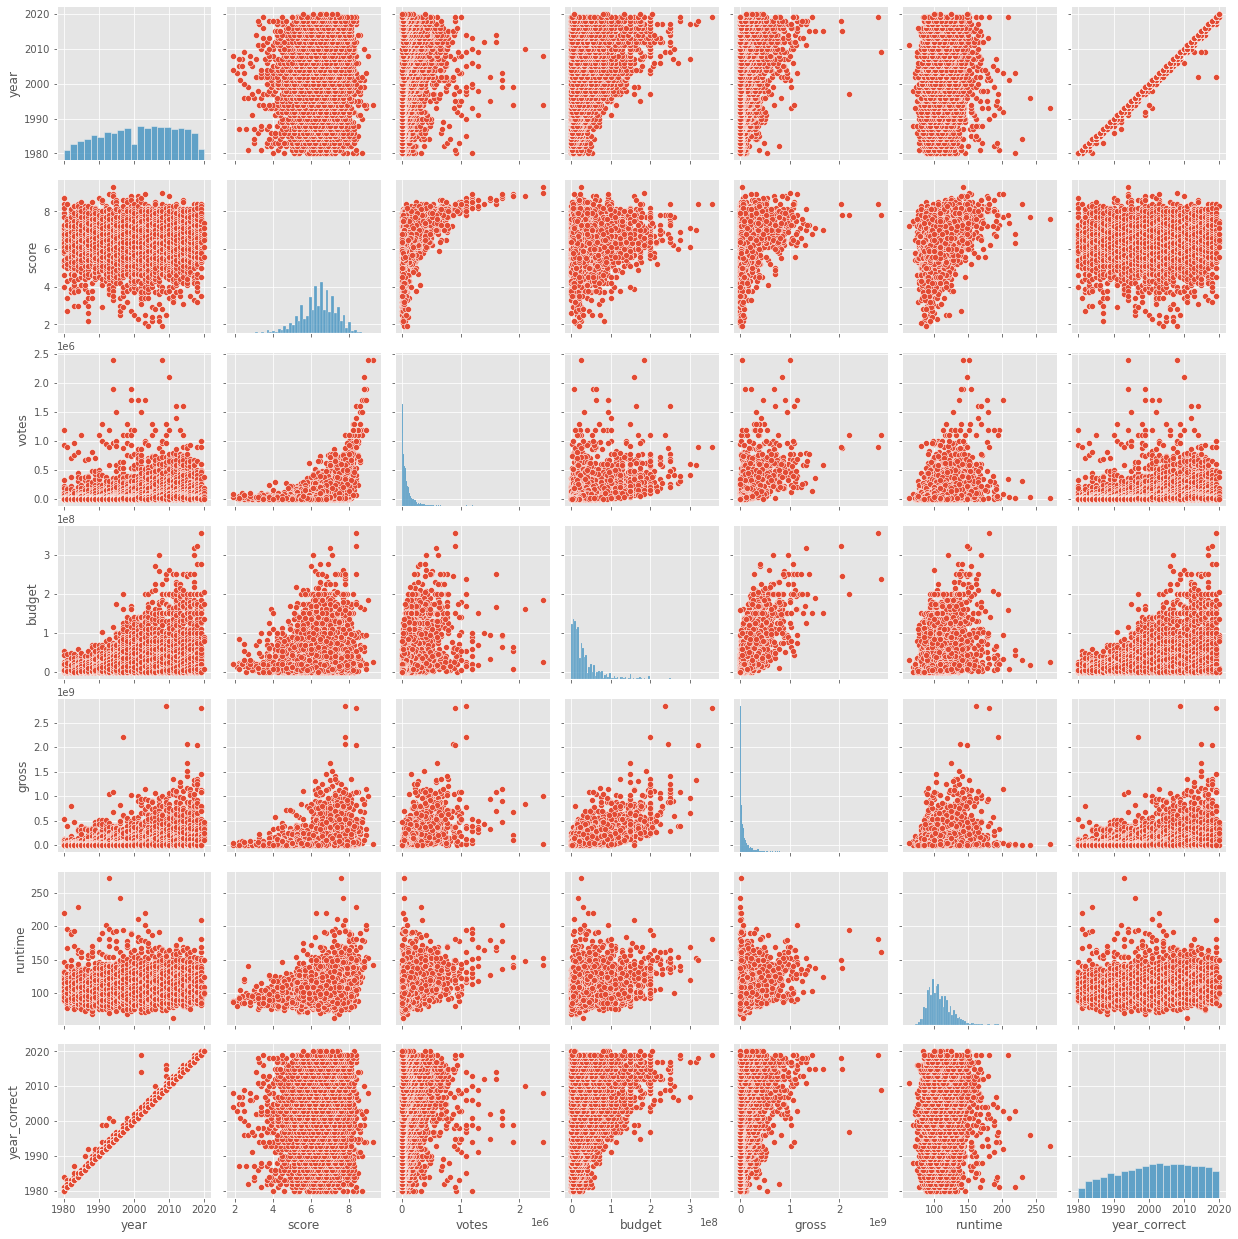

In [27]:
sns.pairplot(df,diag_kind='hist')
plt.show()

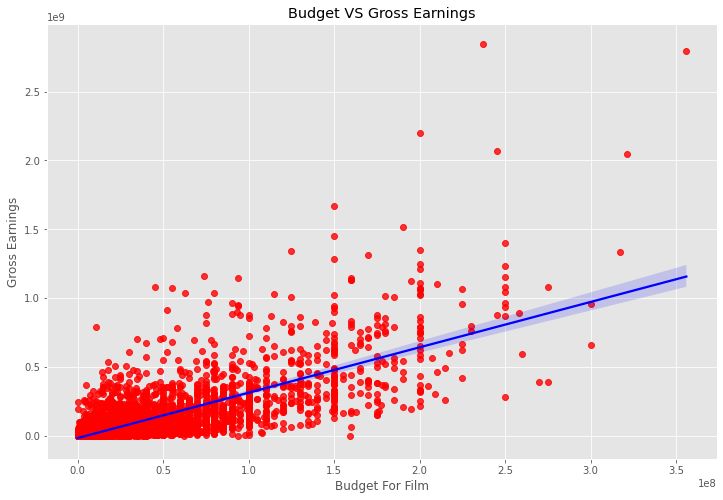

In [28]:
# Plot the Budget Vs Gross usnig Seaborn

sns.regplot(x='budget',y='gross',data=df, scatter_kws = {'color' : 'red'}, line_kws = {'color' : 'blue'})

plt.title('Budget VS Gross Earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')

plt.show()

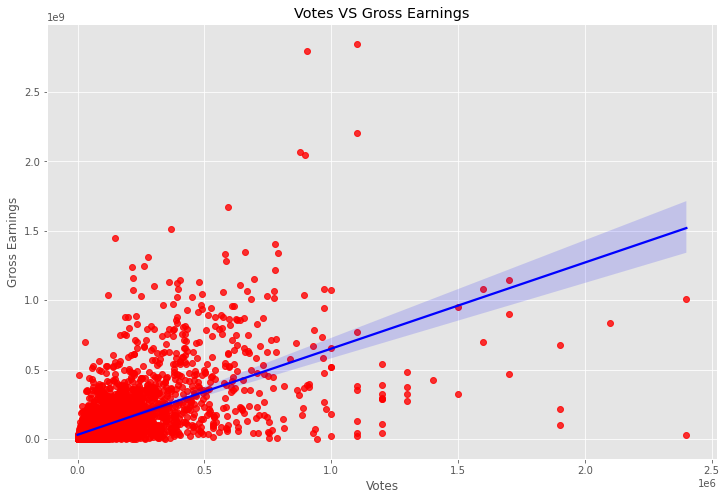

In [29]:
# Plot the Votes Vs Gross usnig Seaborn

sns.regplot(x='votes',y='gross',data=df, scatter_kws = {'color' : 'red'}, line_kws = {'color' : 'blue'})

plt.title('Votes VS Gross Earnings')
plt.xlabel('Votes')
plt.ylabel('Gross Earnings')

plt.show()

In [30]:
com =df.groupby('company')['budget','gross'].sum().sort_values(by='gross',ascending =False)

C:\Users\fady\AppData\Local\Temp\ipykernel_14096\284213912.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  com =df.groupby('company')['budget','gross'].sum().sort_values(by='gross',ascending =False)


In [31]:
com

,budget,gross
company,,
Warner Bros.,19149300000,53402787586
Universal Pictures,15824130001,50762944661
Columbia Pictures,15011107000,40870093831
Twentieth Century Fox,11339600000,39333826704
Paramount Pictures,13323450000,38995978170
...,...,...
.406 Production,250000,10580
Enderby Entertainment,2500000,8315
Two Prong Lesson,3000000,5073


In [39]:
com = df.groupby(['company'])[['budget','gross']].apply(sum).sort_values(by = 'gross', ascending = False)
com.head()

,budget,gross
company,,
Warner Bros.,19149300000,53402787586
Universal Pictures,15824130001,50762944661
Columbia Pictures,15011107000,40870093831
Twentieth Century Fox,11339600000,39333826704
Paramount Pictures,13323450000,38995978170


In [40]:
top10c = com.reset_index()

In [41]:
top10c

,company,budget,gross
0,Warner Bros.,19149300000,53402787586
1,Universal Pictures,15824130001,50762944661
2,Columbia Pictures,15011107000,40870093831
3,Twentieth Century Fox,11339600000,39333826704
4,Paramount Pictures,13323450000,38995978170
...,...,...,...
1459,.406 Production,250000,10580
1460,Enderby Entertainment,2500000,8315
1461,Two Prong Lesson,3000000,5073
1462,Copperheart Entertainment,5000000,2554


In [42]:
top10c = top10c.head(10)

In [43]:
top10c

,company,budget,gross
0,Warner Bros.,19149300000,53402787586
1,Universal Pictures,15824130001,50762944661
2,Columbia Pictures,15011107000,40870093831
3,Twentieth Century Fox,11339600000,39333826704
4,Paramount Pictures,13323450000,38995978170
5,Walt Disney Pictures,9876700000,32859517114
6,New Line Cinema,5396200000,18774065284
7,Marvel Studios,2444000000,13546776896
8,DreamWorks Animation,3344000000,11873612858
9,Dreamworks Pictures,3702700000,10924475124


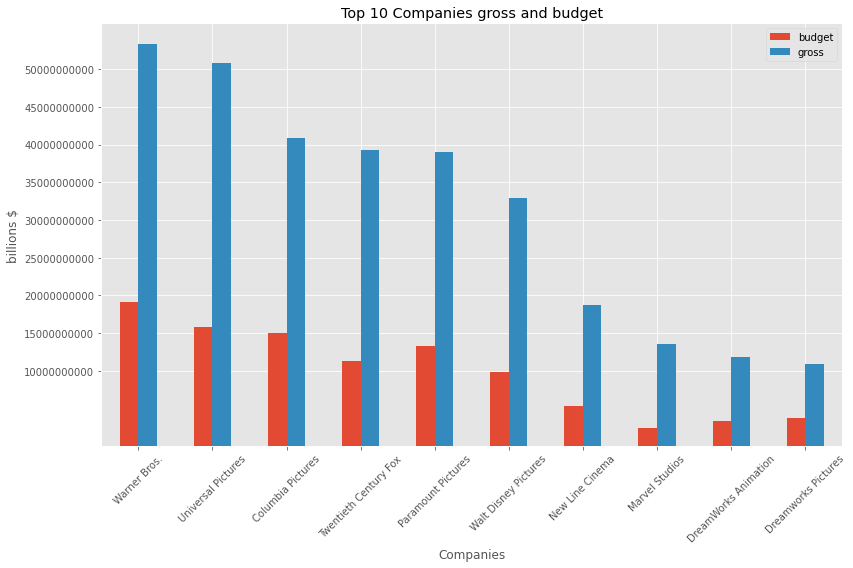

In [55]:
ax = top10c.plot.bar(x='company' , rot=0)
plt.title('Top 10 Companies gross and budget')
plt.xlabel('Companies')
plt.ylabel('billions $')
plt.xticks(ticks=[0,1,2,3,4,5,6,7,8,9],rotation='45');

plt.yticks(range(10000000000, 55000000000, 5000000000))
vals = ax.get_yticks()
ax.set_yticklabels(['{:.0f}'.format(x) for x in vals]) 

plt.tight_layout()
plt.show()

- Show how the budget vs gross for each company and how they earned from there movies 

In [64]:
#  Making a new dataframe for the top 10 companies with the most movie releases
company = df['company'].value_counts()
company = pd.DataFrame(company)
company = company.head(10)
company

,company
Universal Pictures,328
Columbia Pictures,295
Warner Bros.,294
Paramount Pictures,274
Twentieth Century Fox,207
New Line Cinema,151
Touchstone Pictures,104
Walt Disney Pictures,104
Metro-Goldwyn-Mayer (MGM),96
TriStar Pictures,75


In [60]:
company = pd.DataFrame(company)
company = company.head(10)

In [61]:
company

,company
Universal Pictures,328
Columbia Pictures,295
Warner Bros.,294
Paramount Pictures,274
Twentieth Century Fox,207
...,...
Calimari Productions,1
Harvest Filmworks,1
Midwinter Productions Inc.,1
FGM Entertainment,1


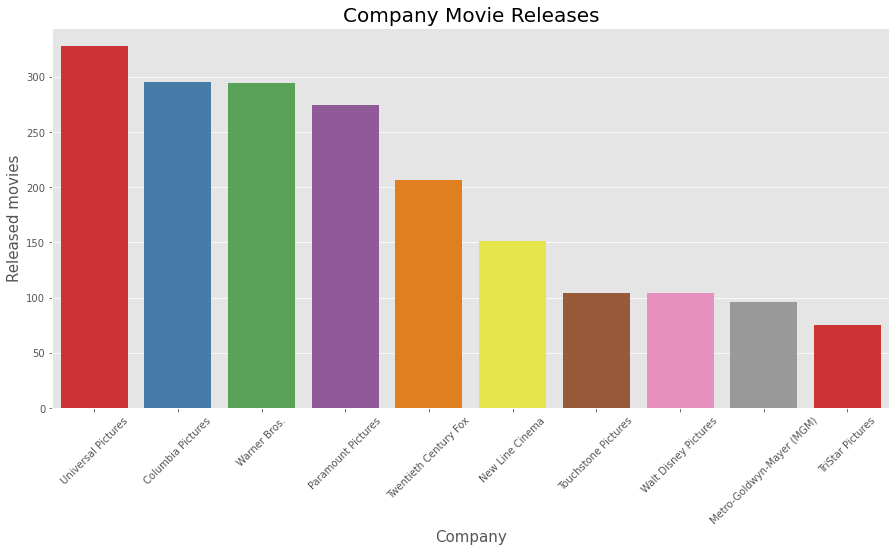

In [70]:
sns.barplot(x=company.index, y=company['company'] , palette="Set1")
# Lables and Titles

labels = company.index.tolist()
plt.gcf().set_size_inches(15, 7)
plt.title('Company Movie Releases', fontsize = 20)
plt.xlabel('Company', fontsize = 15)
plt.ylabel('Released movies', fontsize = 15)
plt.xticks(ticks = [0,1,2,3,4,5,6,7,8,9] , labels = labels, rotation = '45')

plt.show()

- While Warner Bros. has the highest gross it released movies less than Columbia Pictures and Universal Pictures compared to 
- them it has more successful movies than them 

In [80]:
df_rating = df['rating'].value_counts()
df_rating = pd.DataFrame(df_rating)
df_rating

,rating
R,2557
PG-13,1697
PG,897
G,109
Not Rated,43
Unrated,17
NC-17,12
TV-MA,2
Approved,1
X,1


Text(0.5, 1.0, 'Votes')

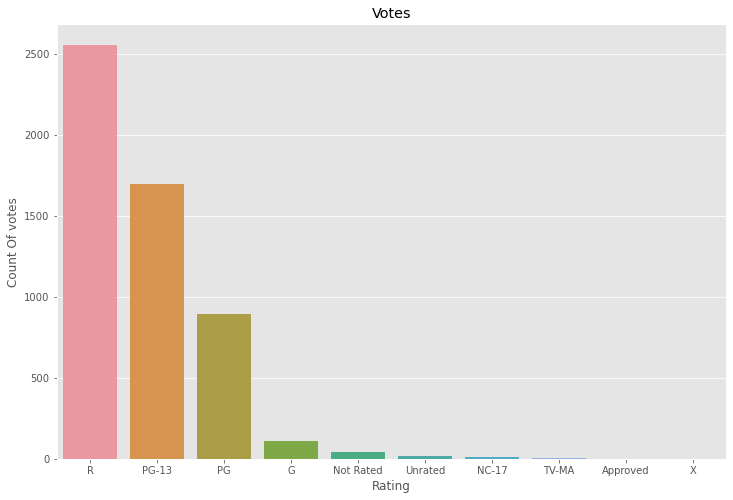

In [90]:
sns.barplot(x=df_rating.index , y=df_rating['rating'])
plt.xlabel('Rating')
plt.ylabel('Count Of votes')
plt.title('Votes')

In [91]:
df_genre = df['genre'].value_counts()
df_genre = pd.DataFrame(df_genre)
df_genre

,genre
Comedy,1483
Action,1385
Drama,851
Crime,388
Adventure,325
Biography,308
Animation,273
Horror,243
Fantasy,41
Mystery,17


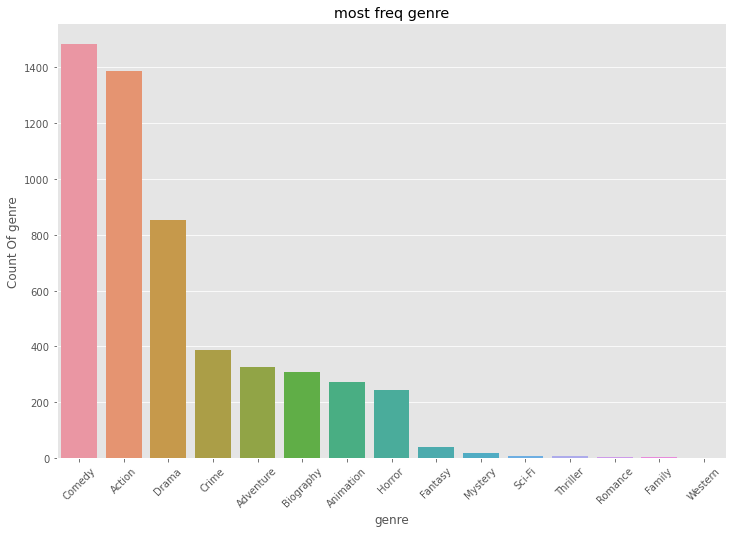

In [93]:
sns.barplot(x=df_genre.index , y=df_genre['genre'])
plt.xlabel('genre')
plt.ylabel('Count Of genre')
plt.title('most freq genre')
plt.xticks(rotation = '45')
plt.show()

IV - Conclusion
- The studied time lapse goes from 1980 to 2020.
- The average film duration is 2 h 33 min.
- Highest counts for rating is R rated
- Highest counts for genre is Comedy
- Woody Allen directed 33 movies
- Nicolas Cage made 39 movies
- Most releases movies was in 2002 with 167 movies in one year
- Shows us high correlation between budget and gross and some what high correlation between votes and gross
- Show how the budget vs gross for each company and how they earned from there movies
- While Warner Bros. has the highest gross it released movies less than Columbia Pictures and Universal Pictures compared to them it has more successful movies than them